# ggplot2 και seaborn Α'

Προσαρμογή του κεφαλαίου 3 του βιβλίου των Hadley Wickham και Garrett Grolemund [R for Data Science](https://r4ds.had.co.nz/) (https://r4ds.had.co.nz/data-visualisation.html).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Πολλές φορές είναι πιο πρακτικό να κάνουμε τα γραφήματά μας με μια βιβλιοθήκη πιο υψηλού επιπέδου από ότι το matplotlib.

* Δύο τέτοιες βιβλιοθήκες είναι οι:

  * [ggplot2](https://ggplot2.tidyverse.org/), η οποία στην Python έχει μεταφερθεί ως [plotnine](https://plotnine.readthedocs.io/en/stable/).
  
  * [seaborn](https://seaborn.pydata.org/)

In [1]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

* Θα χρησιμοποιήσουμε δεδομένα από το https://fueleconomy.gov/.

* Συγκεκριμένα, τα δεδομένα είναι διαθέσιμα στο: https://fueleconomy.gov/feg/ws/.

* Εμείς θα χρησιμοποιήσουμε τα δεδομένα οχημάτων. (https://fueleconomy.gov/feg/epadata/vehicles.csv.zip).

* Το ggplot2 περιλαμβάνει ένα υποσύνολο των δεδομένων.

* Tο υποσύνολο περιέχει ένα μικρό αριθμό στηλών, και μόνο μοντέλα που είχαν νέες εκδόσεις σε κάθε χρονιά από το 1999 μέχρι το 2008 (ώστε να περιλαμβάνονται τα δημοφιλή αυτοκίνητα).

* Ιδού το περιλαμβανόμενο υποσύνολο, το οποίο ονομάζεται `mpg`.

In [2]:
from plotnine.data import mpg
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


* Στο πλήρες σύνολο δεδομένων, το οποίο θα ονομάσουμε `fmpg`, θα χρησιμοποιήσουμε μόνο τις στήλες που υπάρχουν και στο μικρότερο σύνολο δεδομένων.

In [3]:
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

In [5]:
fmpg = pd.read_csv('data/vehicles.csv.zip', usecols=usecols)
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44742,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44743,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44744,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44745,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Για να κάνουμε τη ζωή μας πιο εύκολη, θα μετονομάσουμε τις στήλες του πλήρους συνόλου ώστε να έχουν τα ίδια ονόματα με αυτές του υποσυνόλου.

In [6]:
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44742,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44743,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44744,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44745,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Για να φτιάξουμε ένα γράφημα με το ggplot2, ξεκινάμε δίνοντας `ggplot()`. Αυτό δημιουργεί ένα σύστημα συντεταγμένων.

* Στο σύστημα αυτό προσθέτουμε στρώματα (layers).

* Για να φτιάξουμε ένα *διάγραμμα διασποράς* (scatter plot), προσθέτουμε ένα στρώμα δίνοντας `geom_point()`.

* Αυτή είναι μόνο μία από τις λεγόμενες *γεωμετρίες* που είναι διαθέσιμες στο ggplot2.

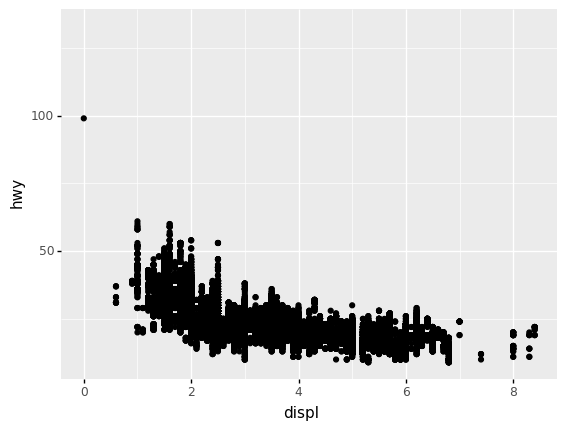

<ggplot: (91332818610)>

In [7]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) # we remore NaNs to avoid getting a warning

* Αμέσως βλέπουμε ένα πρόβλημα με μία έκτοπη τιμή η οποία έχει μέγεθος μηχανής ίσο με το μηδέν.

* Θα την ξεφορτωθούμε.

In [8]:
fmpg.query('displ > 0', inplace=True)

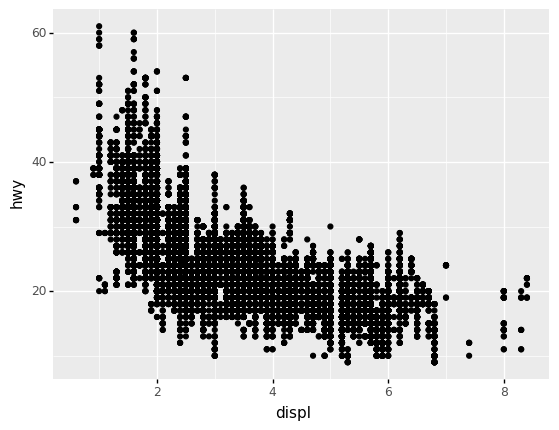

<ggplot: (91332572254)>

In [9]:
ggplot(data=fmpg) + \
  geom_point(mapping = aes(x = 'displ', y = 'hwy'), na_rm=True)

* Και να πώς μπορούμε να πάρουμε το ίδιο διάγραμμα με το seaborn, δίνοντας `scatterplot()`.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

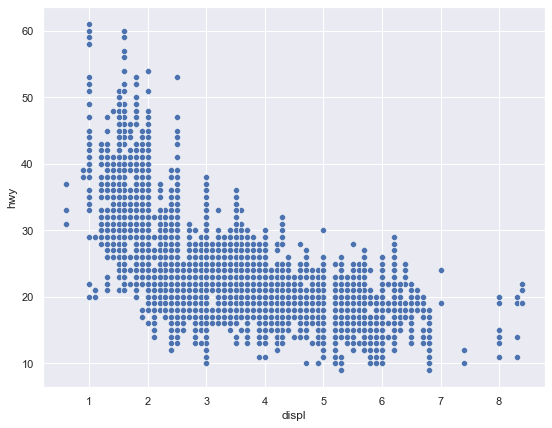

In [10]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(9, 7)})
sns.scatterplot(x='displ', y='hwy', data=fmpg)

* Στο ggplot2 μπορούμε να αλλάξουμε το μέγεθος και τη διαφάνεια των σημείων δίνοντας τις κατάλληλες παραμέτρους στο `geom_point()`.

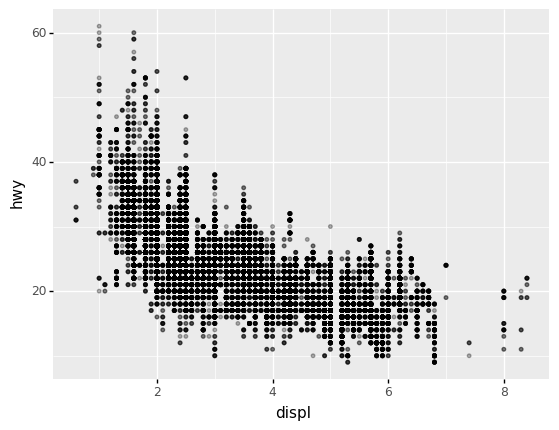

<ggplot: (91337987494)>

In [13]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy'), 
             na_rm=True, size=1, alpha=0.3)

* Ομοίως και στο seaborn.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

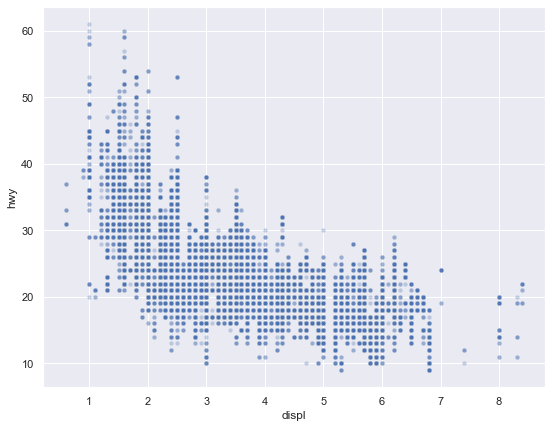

In [14]:
sns.scatterplot(x='displ', y='hwy', s=20, data=fmpg, alpha=0.3)

* Κάθε γεωμετρία χρειάζεται μία απεικόνιση (`mapping`) που ορίζει, μέσω της κλήσης `aes()`, πώς τα δεδομένα θα αντιστοιχίζονται σε αισθητικές παραμέτρους του διαγράμματος.

* Ήδη χρησιμοποιήσαμε τις παραμέτρους `x` και `y` της `aes()`.

* Μπορούμε να χρησιμοποιήσουμε και άλλες παραμέτρους, όπως χρώμα για κάποια ιδιότητα των δεδομένων.

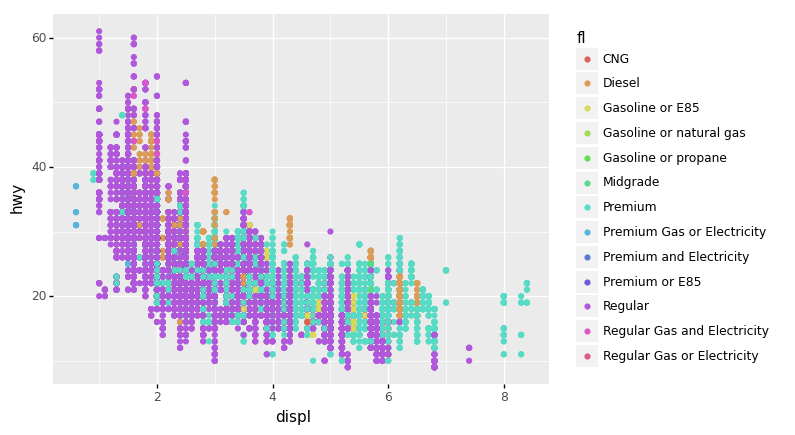

<ggplot: (91333395544)>

In [15]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='fl'), 
             na_rm=True)

* Στο seaborn μπορούμε να πετύχουμε το ίδιο αποτέλεσμα με την παράμετρο `hue`.

* Εδώ χρησιμοποιούμε το `relplot()` αντί για το `scatterplot()`.

* Το `relplot()` είναι μια γενίκευση του `scatterplot()` που δουλεύει σε επίπεδο εικόνας (figure) αντί για άξονες (axes) του matplotlib, όπως κάνει το `scatterplot()`.

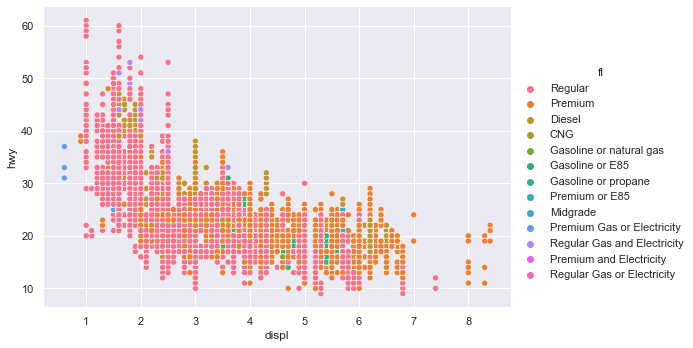

In [16]:
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

* Σε κάθε περίπτωση βλέπουμε ότι έχουμε πολλά διαφορετικά ήδη καυσίμου.

* Και ίσως κάποια από αυτά δεν χρησιμοποιούνται και πολύ.

In [17]:
fmpg.groupby('fl').size()

fl
CNG                               60
Diesel                          1231
Gasoline or E85                 1371
Gasoline or natural gas           20
Gasoline or propane                8
Midgrade                         142
Premium                        13219
Premium Gas or Electricity        55
Premium and Electricity          132
Premium or E85                   127
Regular                        27930
Regular Gas and Electricity       78
Regular Gas or Electricity         4
dtype: int64

* Ε λοιπόν θα τα ομαδοποιήσουμε σε λιγότερες κατηγορίες.

In [18]:
fmpg.loc[fmpg['fl'].str.startswith('Gasoline'), 'fl'] = 'Gasoline'
fmpg.loc[fmpg['fl'].str.startswith('Premium'), 'fl'] = 'Premium'
fmpg.loc[fmpg['fl'].str.startswith('Regular'), 'fl'] = 'Regular'

fmpg.groupby('fl').size()

fl
CNG            60
Diesel       1231
Gasoline     1399
Midgrade      142
Premium     13533
Regular     28012
dtype: int64

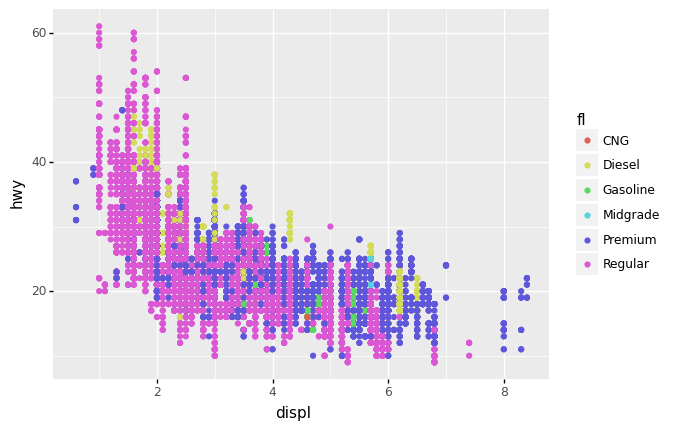

<ggplot: (91332767404)>

In [19]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy', color='fl'), 
               na_rm=True)

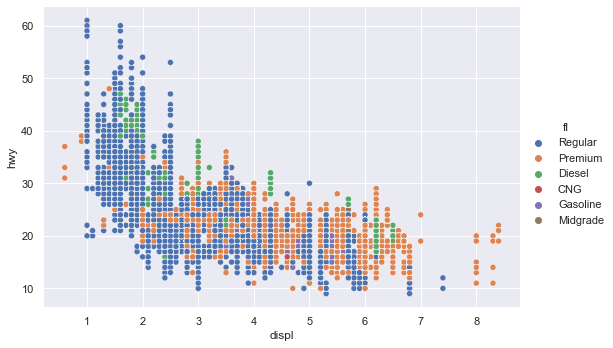

In [20]:
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

* Για να εξερευνήσουμε παραπάνω τα δεδομένα μας, χρησιμοποιώντας την ιδιότητα `class` των οχημάτων.

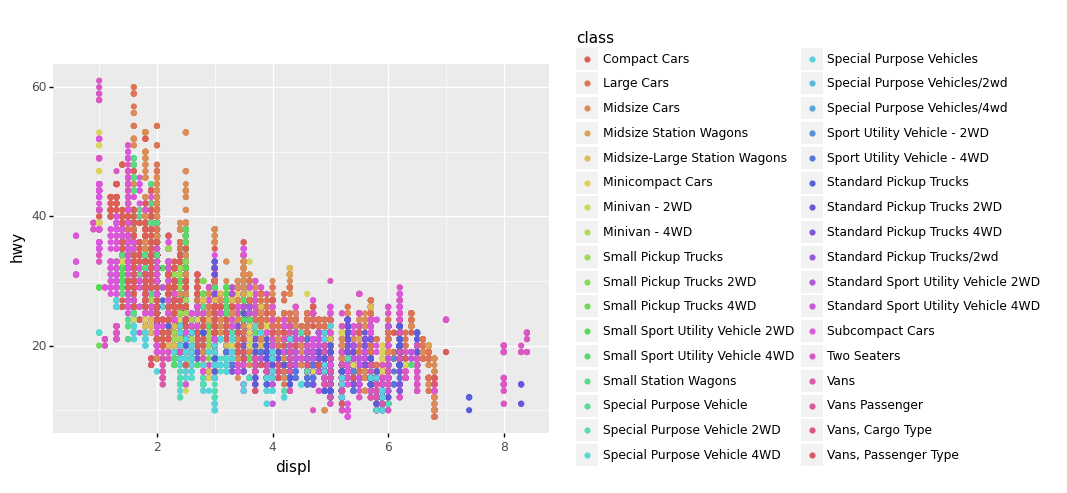

<ggplot: (91333145399)>

In [21]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

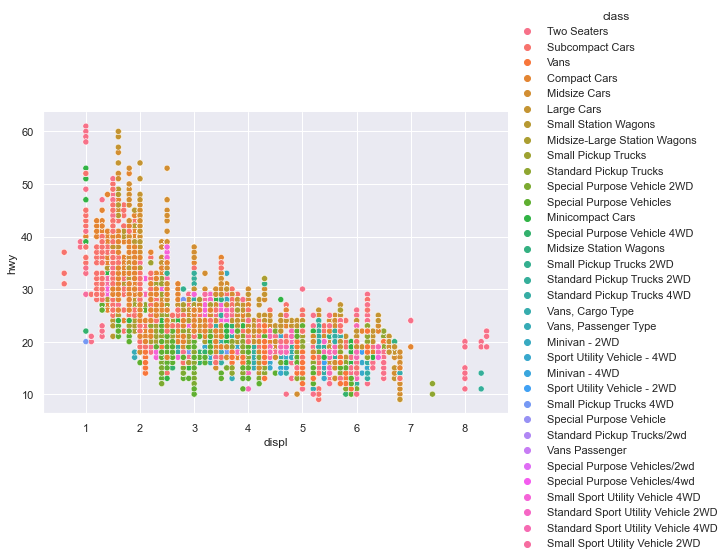

In [22]:
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

* Βλέπουμε πάλι ότι έχουμε πάρα πολλές κλάσεις.

* Το ggplot2 τα χειρίστηκε με σχετική χάρη, αλλά το seaborn μάλλον όχι και τόσο, όσον αφορά το υπόμνημα.

* Σε κάθε περίπτωση θα περιορίσουμε πάλι τον αριθμό των κλάσεων.

In [23]:
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

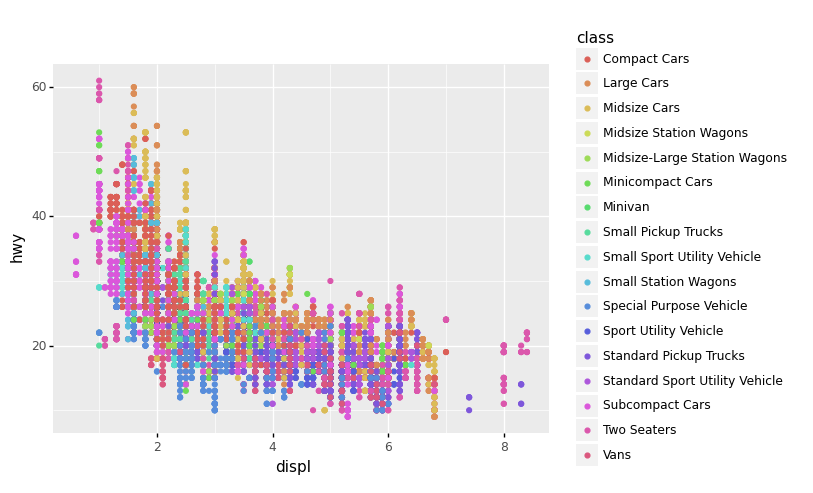

<ggplot: (91340330394)>

In [24]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

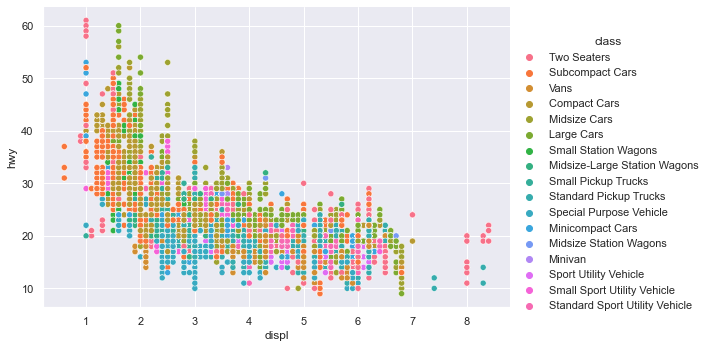

In [25]:
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

* Τώρα θα προχωρήσουμε να φτιάξουμε ένα αντίστοιχο διάγραμμα, αλλά θα χρησιμοποιήσουμε την ιδιότητα `year` για το χρώμα.

* Μπορούμε να διαπιστώσουμε ότι η κατανάλωση καυσίμου βελτιώνεται με την πάροδο του χρόνου.

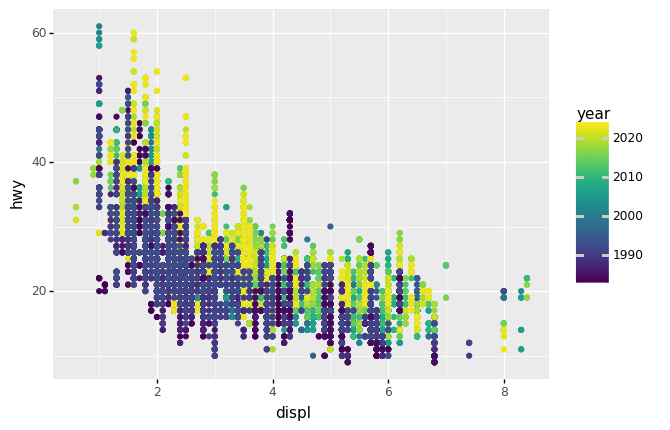

<ggplot: (91340489048)>

In [26]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='year'), 
             na_rm=True)

* Αν προσπαθήσουμε να πάρουμε το ίδιο διάγραμμα με το seaborn θα δούμε ότι το υπόμνημα είναι ίσως λιγότερο πληροφοριακό.

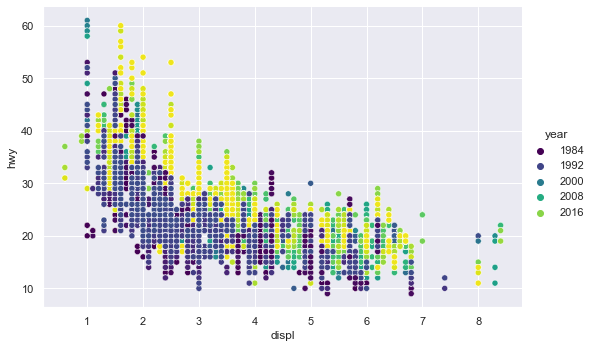

In [27]:
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis', 
                height=5, aspect=1.5, data=fmpg)

* Με λίγη περισσότερη δουλειά μπορούμε να βάλουμε μια ράβδο χρωμάτων, όπως και στο ggplot2.

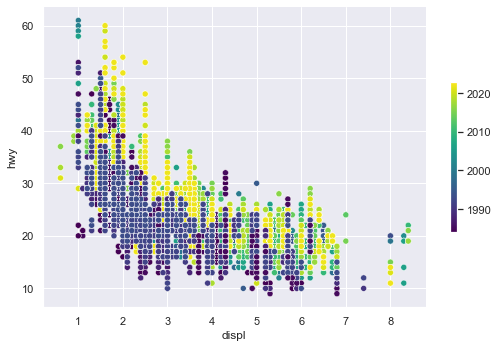

In [28]:
sns.set_style('dark')
norm = plt.Normalize(fmpg.year.min(), fmpg.year.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis',
                height=5, aspect=1.5, legend=False, data=fmpg)
g.fig.colorbar(sm, shrink=0.5)
plt.grid()

* Ας περάσουμε στην κατανάλωση, λαμβάνοντας υπόψη και τον αριθμό των κυλίνδρων.

C:\Users\Christos\Anaconda3\envs\py39\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


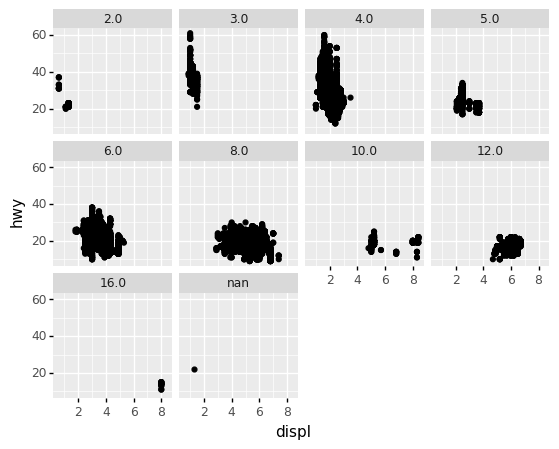

<ggplot: (91340494084)>

In [29]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~cyl')

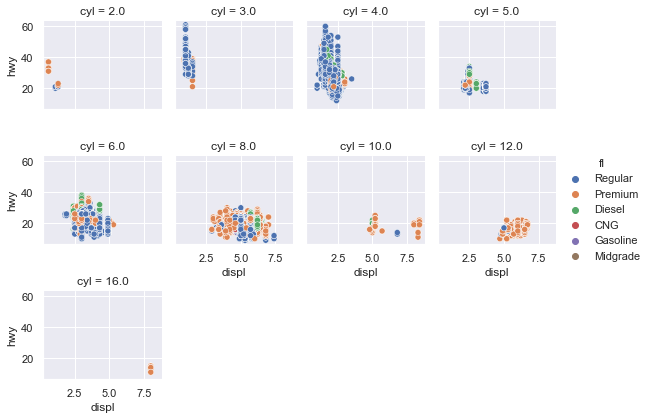

In [31]:
sns.set_theme()
sns.relplot(x='displ', y='hwy', hue='fl', col='cyl', 
            height=2, aspect=1,
            col_wrap=4, data=fmpg)

* Ή ας δούμε τι προκύπτει όσον αφορά το είδος κίνησης. 

C:\Users\Christos\Anaconda3\envs\py39\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


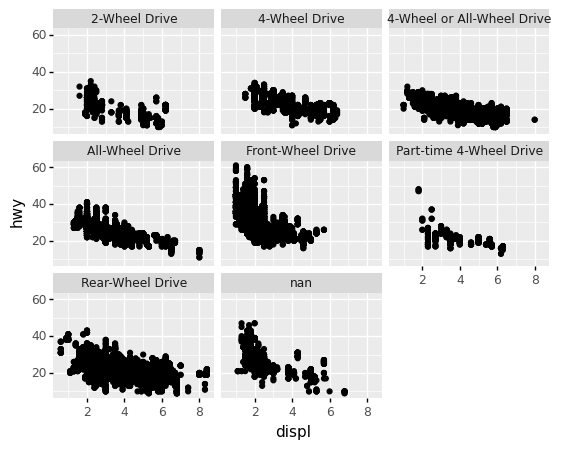

<ggplot: (91336895320)>

In [32]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv')

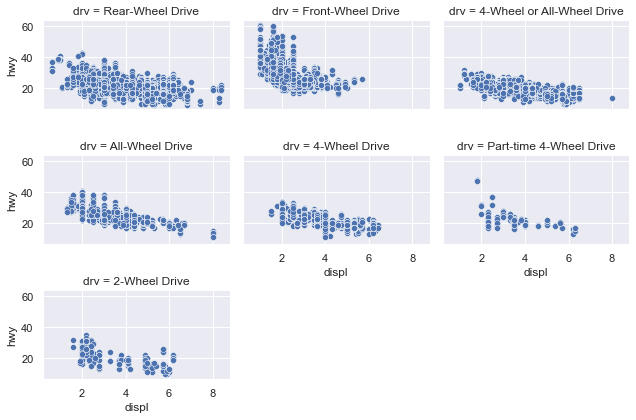

In [33]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=2, aspect=1.5,
            col_wrap=3, data=fmpg)

* Για άλλη μια φορά βλέπουμε διαφορετικές τιμές για την ιδιότητα `drv` που μάλλον δεν μας ενδιαφέρουν, οπότε τις ομογενοποιούμε.

In [34]:
fmpg.loc[fmpg['drv'].str.contains('4-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('All-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('2-Wheel', na=False), 'drv'] = '2W'
fmpg.loc[fmpg['drv'].str.contains('Rear-Wheel', na=False), 'drv'] = 'R'
fmpg.loc[fmpg['drv'].str.contains('Front-Wheel', na=False), 'drv'] = 'F'

C:\Users\Christos\Anaconda3\envs\py39\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


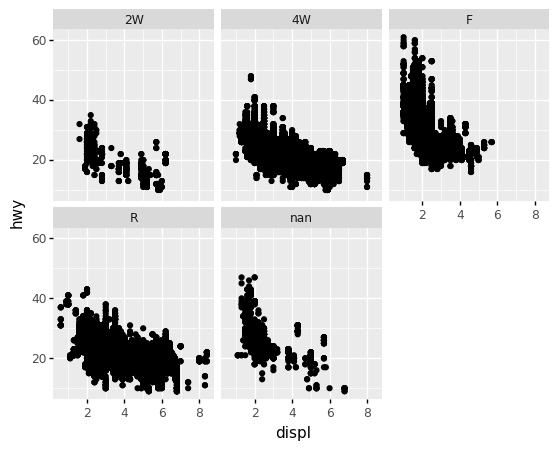

<ggplot: (91340335312)>

In [35]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv')

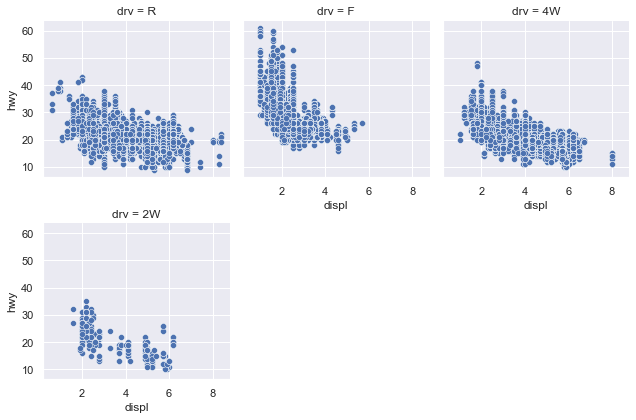

In [36]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=3, aspect=1,
            col_wrap=3, data=fmpg)

* Οπότε μπορούμε να φτιάξουμε και διαγράμματα που αντιπαραθέτουν τις ιδιότητες `drv` και `cyl`.

C:\Users\Christos\Anaconda3\envs\py39\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


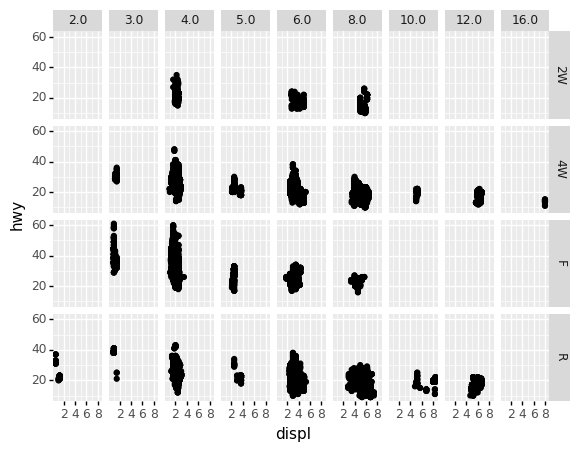

<ggplot: (91333387611)>

In [37]:
ggplot(data = fmpg.query('(cyl == cyl) & (drv == drv)')) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_grid('drv ~ cyl')

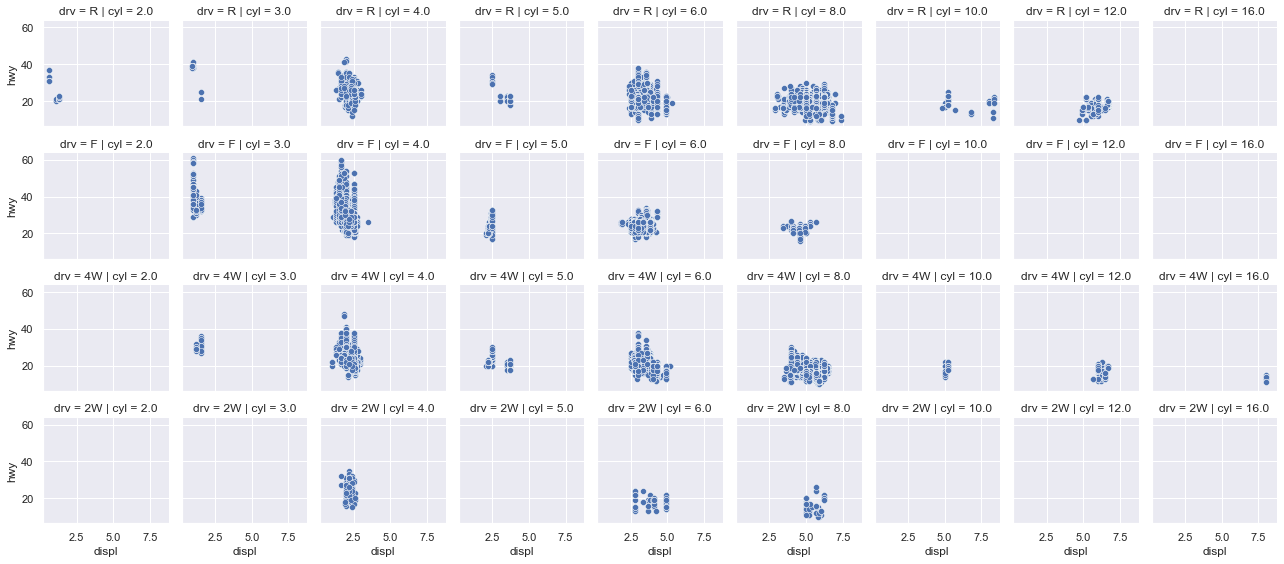

In [38]:
sns.relplot(x='displ', y='hwy', col='cyl', row='drv', 
            height=2, aspect=1,
            data=fmpg)

* Ας επιστρέψουμε στο αρχικό μας διάγραμμα με την ιδιότητα `displ` σε σχέση με την `hwy`.

* Στο ggplot2 μπορούμε να προσθέσουμε στρώματα προσθέτοντας γεωμετρίες.

* Οπότε μπορούμε να προσθέσουμε μια γραμμή που να ταιριάζει (fit) στα δεδομένα.

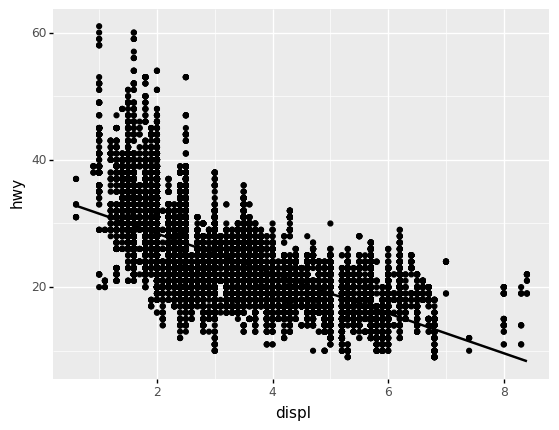

<ggplot: (91341128376)>

In [39]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy')) + \
    geom_smooth(mapping=aes(x = 'displ', y = 'hwy'), stat='smooth')

* Το ίδιο αποτέλεσμα μπορούμε να επιτύχουμε στο seaborn με το `regplot()`.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

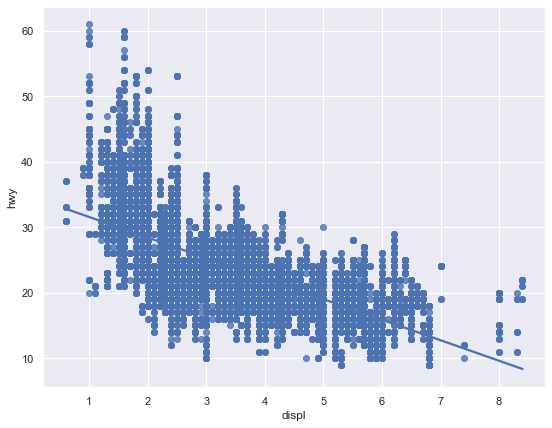

In [40]:
sns.regplot(x='displ', y='hwy', data=fmpg)

* Αν θέλουμε μπορούμε να παράξουμε γραμμές για ξεχωριστά υποσύνολα των δεδομένων.

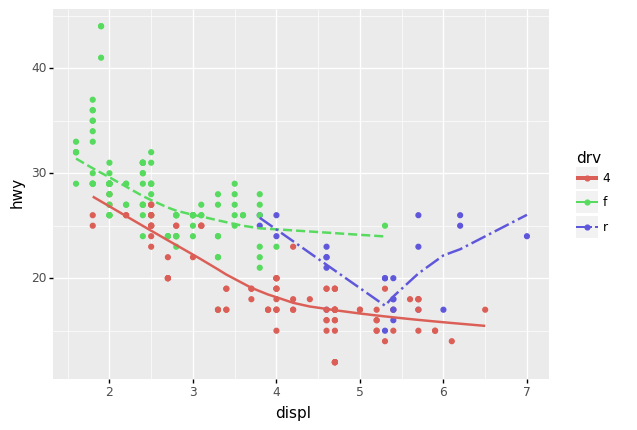

<ggplot: (91339997365)>

In [41]:
ggplot(data=mpg) + \
    geom_point(mapping=aes(x='displ', y ='hwy', color='drv')) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', color='drv', linetype='drv'), se=False)

* Ομοίως και στο seaborn.

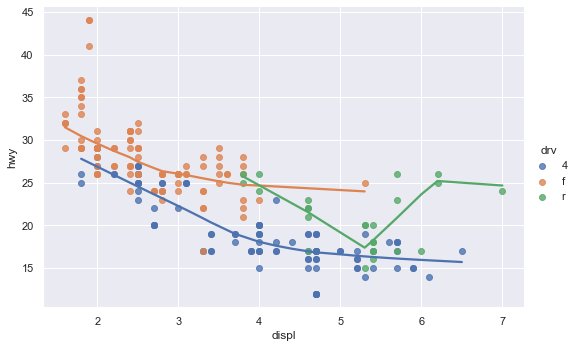

In [44]:
sns.lmplot(x='displ', y='hwy', hue='drv',
           height=5, aspect=1.5,
           lowess=True,
           data=mpg)

* Αν σχεδιάσουμε μια γραμμή ανά χρονιά μπορούμε να δούμε καθαρότερα τη βελτίωση στην κατανάλωση καυσίμου στην εξέλιξη του χρόνου.

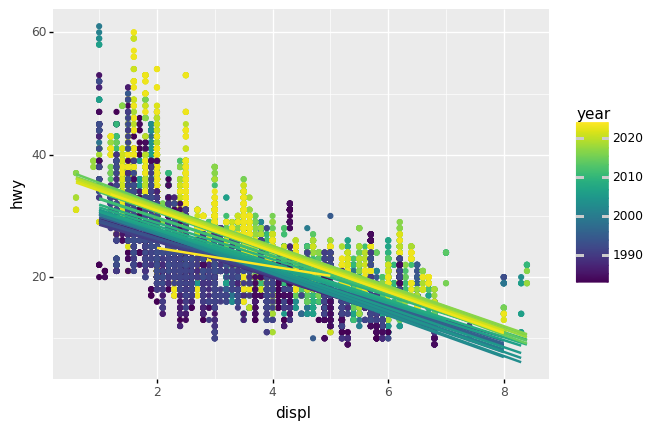

<ggplot: (91345760299)>

In [45]:
ggplot(data = fmpg) + \
    geom_point(mapping = aes(x='displ', y='hwy', color='year'), 
               na_rm=True) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', group='year', color='year'),
                se=False)

* Ομοίως στο seaborn.

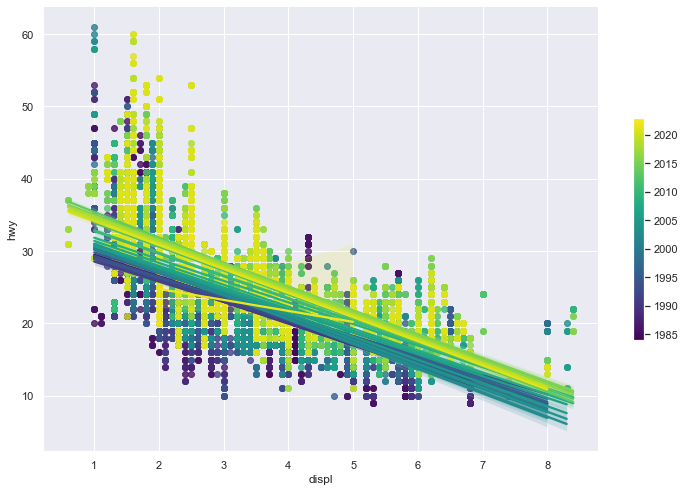

In [46]:
sns.set_style("dark")
norm = plt.Normalize(fmpg.year.min(), fmpg.year.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.lmplot(x='displ', y='hwy', hue='year', palette='viridis', 
           height=7, aspect=1.5, legend=False, data=fmpg)
g.fig.colorbar(sm, shrink=0.5)
plt.grid()